In [61]:
import rishi_utils as ru
from rdkit import Chem
import fall20_mse_8803 as retro
import importlib
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
importlib.reload(retro)
importlib.reload(ru)
import numpy as np

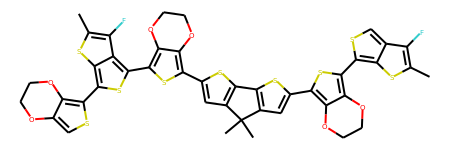

In [2]:
Chem.MolFromSmiles('Cc1sc2c(-c3sc(-c4cc5c(s4)-c4sc(-c6sc(-c7sc(-c8scc9c8OCCO9)c8sc(C)c(F)c78)c7c6OCCO7)cc4C5(C)C)c4c3OCCO4)scc2c1F')

# Test is_symmetric2

In [ ]:
Chem.Atom.GetProp

In [5]:
m.GetAtoms()[0].GetPropsAsDict()

{'__computedProps': <rdkit.rdBase._vectNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE at 0x7f8972e491b0>,
 '_CIPRank': 16,
 '_GasteigerCharge': -0.04416729327207542,
 '_GasteigerHCharge': 0.0637734946058738}

In [6]:
m.GetAtoms()[0].GetProp('_GasteigerCharge')

'-0.044167293272075421'

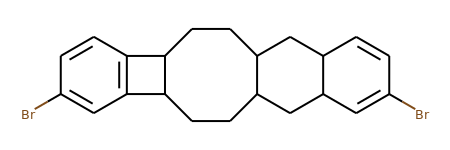

In [2]:
m = Chem.MolFromSmiles('C1=C(C=CC2=C1C3C2CCC4C(CC3)CC5C(C4)C=CC(=C5)Br)Br')
m

In [20]:
retro.is_symmetric2(m,'Br')

False

In [18]:
retro.is_symmetric2('C=C','C')

True

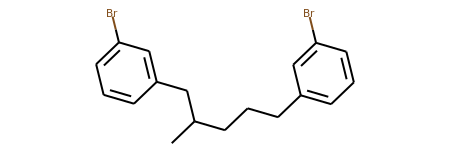

In [2]:
m2 = Chem.MolFromSmiles('C(C(CCCC1=CC=CC(=C1)Br)C)C2=CC(=CC=C2)Br')
m2

In [24]:
retro.is_symmetric2(m2,'Br')

False

In [6]:
retro.is_symmetric2(m2,'Br')

False

# ox_depolymerize scratch

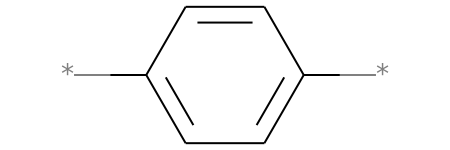

In [65]:
mol = Chem.MolFromSmiles('*c1ccc(*)cc1')
mol

In [66]:
mol.GetAtoms()[2].GetBonds()[0].GetBondTypeAsDouble()

1.5

In [67]:
lp = ru.LinearPol(mol)
if retro.is_symmetric2(lp.mol,'*'):
    bonds = lp.mol.GetAtoms()[max(lp.connector_inds)].GetBonds()
    bond_types = np.array([b.GetBondTypeAsDouble() for b in bonds])
    if any(bond_types > 1):
        em = Chem.EditableMol(lp.mol)
        em.RemoveAtom(max(lp.star_inds))
        em.RemoveAtom(min(lp.star_inds))
        try:
            new_mol = em.GetMol()
            Chem.SanitizeMol(new_mol)
            #return new_mol
        except:
            print(None)
            #return None
    else:
        print(None)
        #return None
else:
    print(None)
    #return None

In [68]:
Chem.SanitizeMol(new_mol)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [69]:
mol.GetBonds()[6].GetBondTypeAsDouble()

1.5

In [70]:
mol.GetBonds()[6].GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

# Test ox_depolymerize

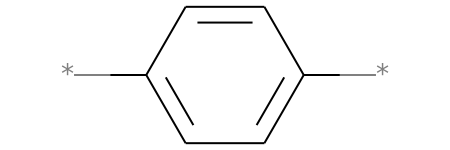

In [98]:
mol = Chem.MolFromSmiles('*c1ccc(*)cc1')
mol

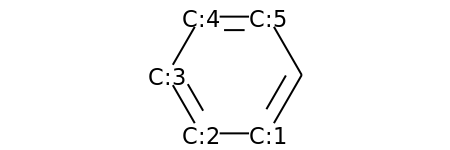

In [99]:
retro.ox_depolymerize(mol)

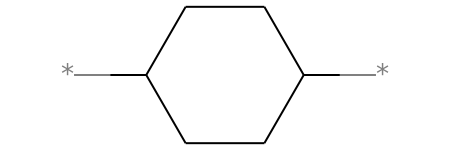

In [100]:
mol = Chem.MolFromSmiles('*C1CCC(*)CC1')
mol

In [101]:
retro.ox_depolymerize(mol) #should return nothing. No double bonds

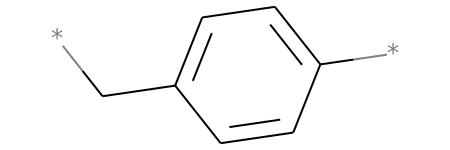

In [102]:
mol3 = Chem.MolFromSmiles('*Cc1ccc(*)cc1')
mol3

In [103]:
retro.ox_depolymerize(mol3) #should return nothing. Not symmetric

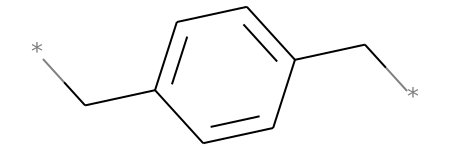

In [104]:
mol4 = Chem.MolFromSmiles('*Cc1ccc(C*)cc1')
mol4

In [105]:
retro.ox_depolymerize(mol4) #should return nothing. Connector atoms do not have pi electrons

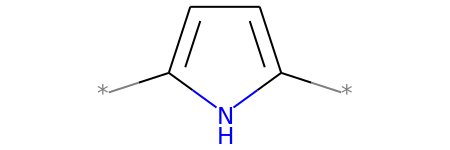

In [7]:
mol5 = Chem.MolFromSmiles('*c1ccc(*)[nH]1')
mol5

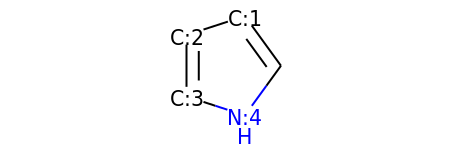

In [8]:
retro.ox_depolymerize(mol5) #should return something

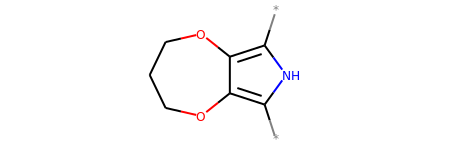

In [2]:
mol6 = Chem.MolFromSmiles('*c1[nH]c(*)c2OCCCOc12')
mol6

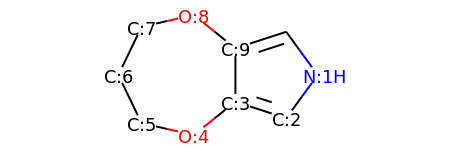

In [3]:
retro.ox_depolymerize(mol6) #shoudld return something

# Look thru G2G success polymers

In [3]:
success = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/new_polymers_12_43PM_on_June_23_2020_sortedObjective.csv')
success.head()

len(success)

smiles_ls = success['SMILES'].tolist()
inds = [x for x in smiles_ls if retro.ox_depolymerize(x) != None]
inds

len(inds)

0

# Look thru relaxed G2G polymers 

In [13]:
df = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/results_List/uniqueCanPolyAndProps.csv')
df.head()

df_med = df[(df['bg']>5.5)&(df['cib']>2.5)&(df['tg']>400)].drop_duplicates()
smiles_ls = df_med['smiles'].tolist()

In [95]:
smiles_ls[0:5]

['[*]C1NC(C)CN(C(=O)C2CCCCC2C(=O)N2CC(C)N(C(=O)C3CCCCC3C=O)C([*])C2C)C1C',
 '[*]C1CC(CC2CCC(NC(=O)OC3CC4CC(OC(=O)NC5CCC(CC6CCC(NC(=O)O)CC6)CC5[*])CC(C3)O4)CC2)CCC1NC(=O)OC1CC2CCCC(C1)O2',
 '[*]C1(CCC2CCC3([*])C2C2CC3C(C)(C(=O)OC)C2)C(C)CC2C3CC(CC3(C)C(=O)OC)C21',
 '[*]C(CCCC)CC1(C)CC2CC1C1C(CCC3CCC4C3C3CC4C(C)(C4=NC(=O)C(C)(O)O4)C3)C([*])C(CC)C21',
 '[*]C1C(OC(=O)NCCCC(C)NC(C)=O)CC2CC(OC(=O)OC3CC4CC(OC(=O)OC5CC6CCCC(C5)O6)C([*])C(C3)O4)CC1O2']

In [6]:
inds = [x for x in smiles_ls if retro.ox_depolymerize(x) != None]
inds

len(inds)

1

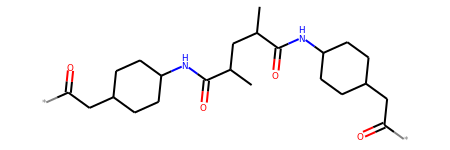

In [7]:
Chem.MolFromSmiles(inds[0])

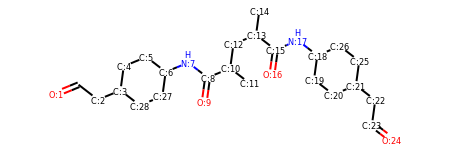

In [8]:
retro.ox_depolymerize(inds[0])

# Check symmetry

In [21]:
inds = []
for x in smiles_ls:
    lp = ru.LinearPol(x)
    if len(set(lp.connector_inds)) == 2:
        m=lp.delStarMol()
        if retro.is_symmetric2(m,group=lp.delStarMolInds):
            inds += [x]

In [22]:
len(inds)

51

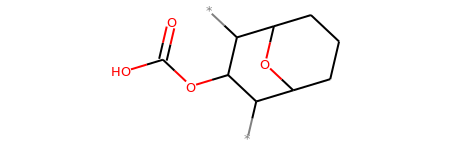

In [23]:
Chem.MolFromSmiles(inds[0])

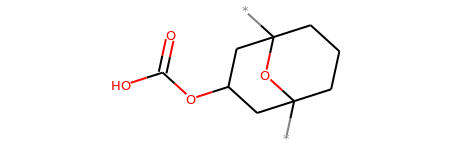

In [25]:
Chem.MolFromSmiles(inds[1])

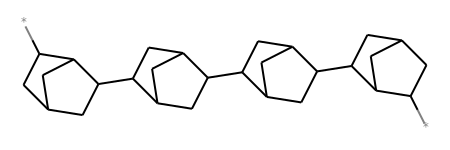

In [26]:
Chem.MolFromSmiles(inds[2])

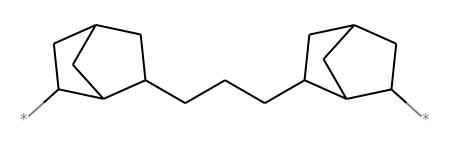

In [27]:
Chem.MolFromSmiles(inds[3])

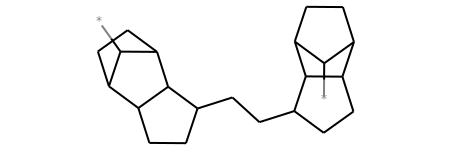

In [28]:
Chem.MolFromSmiles(inds[4])

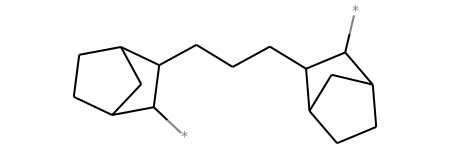

In [29]:
Chem.MolFromSmiles(inds[5])

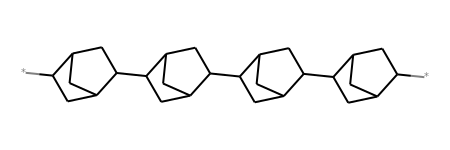

In [30]:
Chem.MolFromSmiles(inds[6])

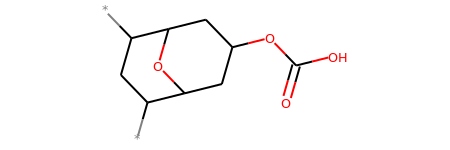

In [31]:
Chem.MolFromSmiles(inds[7])

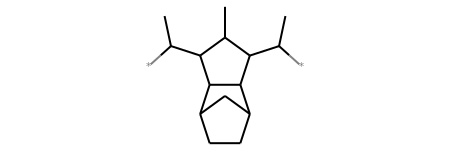

In [32]:
Chem.MolFromSmiles(inds[8])

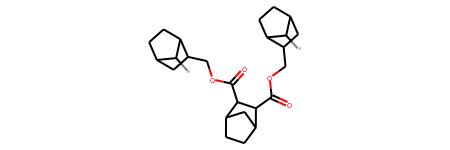

In [33]:
Chem.MolFromSmiles(inds[9])

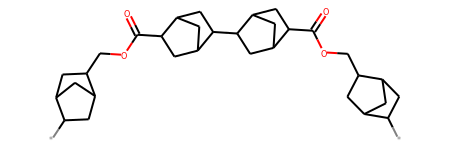

In [34]:
Chem.MolFromSmiles(inds[10])

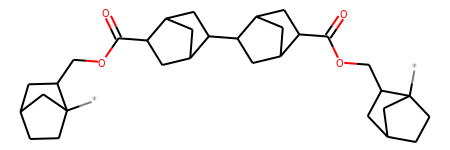

In [35]:
Chem.MolFromSmiles(inds[11])

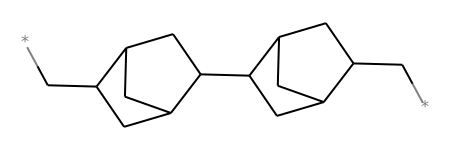

In [36]:
Chem.MolFromSmiles(inds[12])

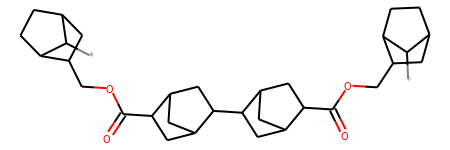

In [37]:
Chem.MolFromSmiles(inds[13])

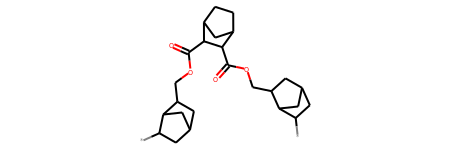

In [38]:
Chem.MolFromSmiles(inds[14])

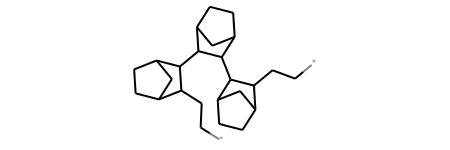

In [39]:
Chem.MolFromSmiles(inds[15])

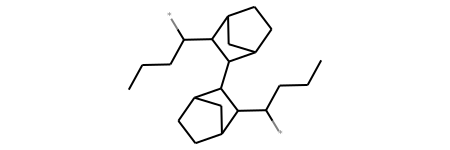

In [40]:
Chem.MolFromSmiles(inds[16])

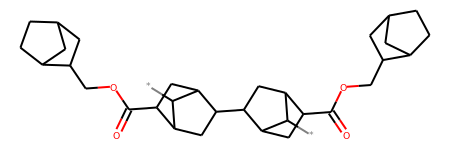

In [41]:
Chem.MolFromSmiles(inds[17])

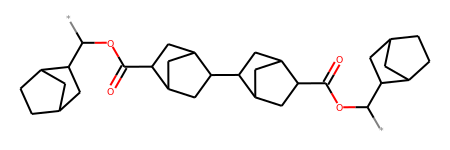

In [42]:
Chem.MolFromSmiles(inds[18])

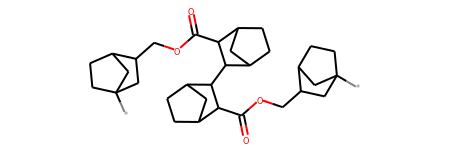

In [43]:
Chem.MolFromSmiles(inds[19])

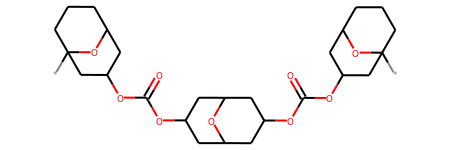

In [44]:
Chem.MolFromSmiles(inds[20])

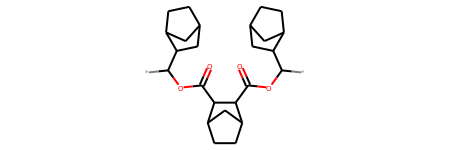

In [45]:
Chem.MolFromSmiles(inds[21])

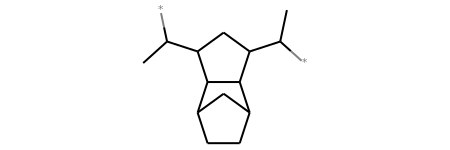

In [46]:
Chem.MolFromSmiles(inds[22])

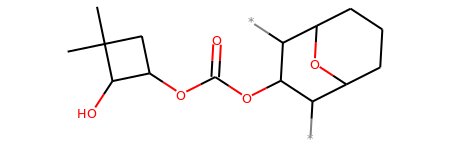

In [47]:
Chem.MolFromSmiles(inds[23])

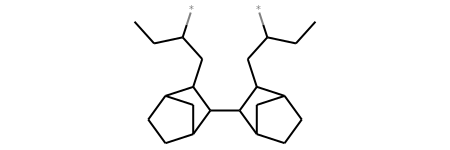

In [48]:
Chem.MolFromSmiles(inds[24])

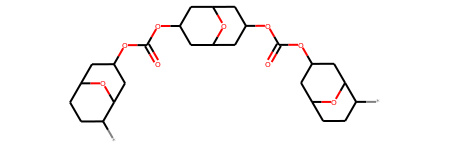

In [49]:
Chem.MolFromSmiles(inds[25])

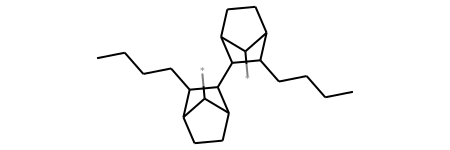

In [50]:
Chem.MolFromSmiles(inds[26])

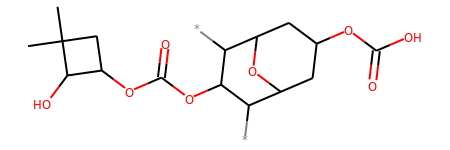

In [51]:
Chem.MolFromSmiles(inds[27])

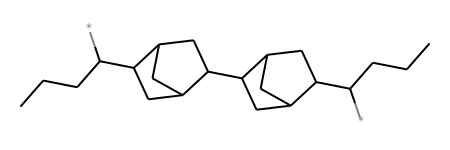

In [52]:
Chem.MolFromSmiles(inds[28])

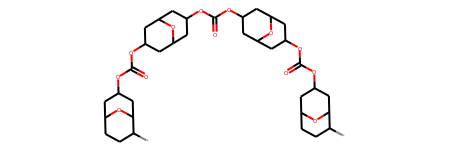

In [53]:
Chem.MolFromSmiles(inds[29])

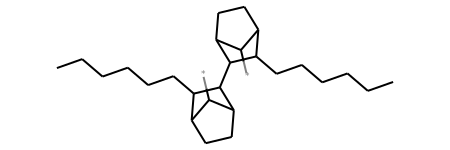

In [54]:
Chem.MolFromSmiles(inds[40])

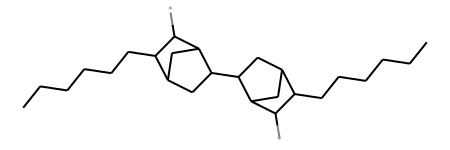

In [55]:
Chem.MolFromSmiles(inds[47])

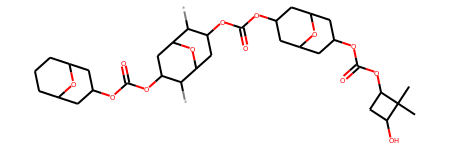

In [56]:
Chem.MolFromSmiles(inds[50])

# Look for resonance

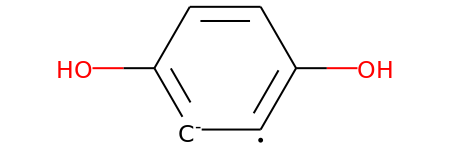

In [15]:
mol = Chem.MolFromSmiles('Oc1[c][c-]c(O)cc1')
mol

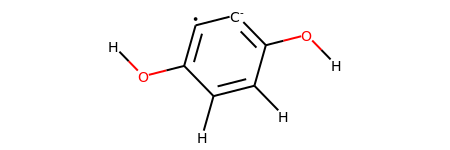

In [16]:
Chem.AddHs(mol)

In [17]:
a=Chem.ResonanceMolSupplier(mol)

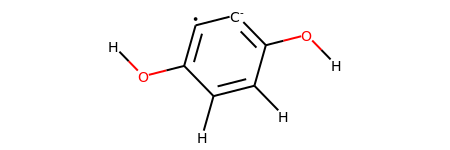

In [18]:
Chem.AddHs(a[0])

In [19]:
Chem.AddHs(a[1])

ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)

In [20]:
Chem.AddHs(a[2])

ArgumentError: Python argument types in
    rdkit.Chem.rdmolops.AddHs(NoneType)
did not match C++ signature:
    AddHs(RDKit::ROMol mol, bool explicitOnly=False, bool addCoords=False, boost::python::api::object onlyOnAtoms=None, bool addResidueInfo=False)

# Create function for drawing depolymerizations

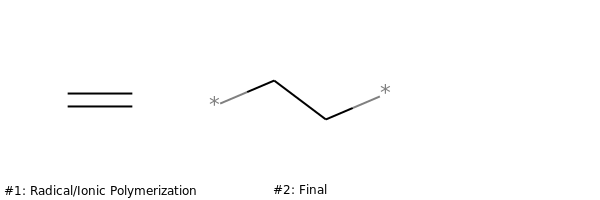

In [2]:
p_mol = '*CC*'#polymer mol
dp_func = retro.frp_depolymerize #depolymerization function
if type(p_mol) == str:
    p_mol = Chem.MolFromSmiles('*CC*')
monomer = dp_func(p_mol)
label_dict = {
    retro.frp_depolymerize: 'Radical/Ionic Polymerization'
}
Chem.Draw.MolsToGridImage((monomer,p_mol),legends=['#1: %s' %(label_dict[dp_func]),'#2: Final'])

# Test function for drawing depolymerizations

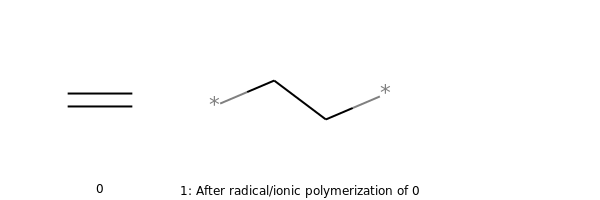

In [3]:
importlib.reload(retro)
retro.drawRxn(p_mol,retro.frp_depolymerize)

# Step-growth polymerizations

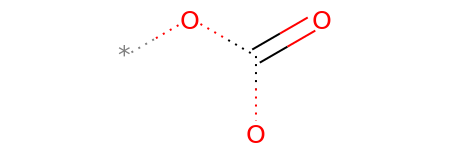

In [62]:
#OH-Cl
polymer_linkage = Chem.MolFromSmarts('*OC(=O)O')
polymer_linkage

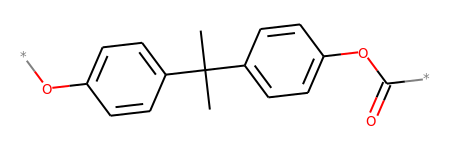

In [63]:
polymer = Chem.MolFromSmiles('*Oc2ccc(C(C)(C)c1ccc(OC(*)=O)cc1)cc2')
polymer

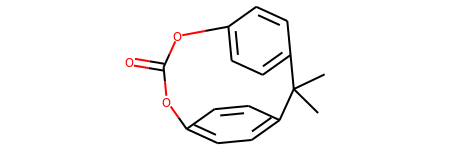

In [65]:
lp = ru.LinearPol(polymer)
pm = lp.PeriodicMol()
pm

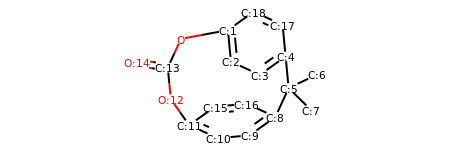

In [66]:
ru.mol_with_atom_index(pm)

In [67]:
matches=pm.GetSubstructMatches(polymer_linkage)
matches

((1, 0, 13, 14, 12), (11, 12, 13, 14, 0))

In [131]:
# *OC(=O)O
#i_left_star,i_o_right,i_c,i_dbl0,i_o_left,i_right_star = matches[0]
new_mols = None
match_pairs = list(itertools.combinations(matches, 2))#implement
#for match_pair in matches:
match_pair = matches #needs to be commented out
ai_r,ai_o_right,ai_c,i_dbl0,ai_o_left = match_pair[0]
bi_r,bi_o_right,bi_c,bi_dbl0,bi_o_left = match_pair[1]

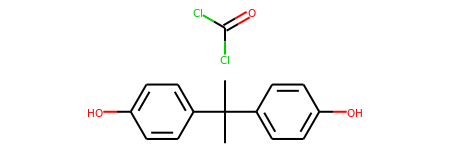

In [135]:
em = Chem.EditableMol(pm)
em.RemoveBond(ai_o_left,ai_c)
em.RemoveBond(bi_o_left,bi_c)
i_cl1 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
i_cl2 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
em.AddBond(ai_c,i_cl1,Chem.BondType.SINGLE)
em.AddBond(bi_c,i_cl2,Chem.BondType.SINGLE)
new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

In [69]:
frag_ids = Chem.GetMolFrags(new_mol, asMols=False)
frag_mols = Chem.GetMolFrags(new_mol, asMols=True)
frag_ids

((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18), (13, 14, 19, 20))

In [72]:
cl_ind = [i for i,x in enumerate(frag_ids) if i_dbl0 in x][0]
if cl_ind == 0:
    oh_ind = 1
else:
    oh_ind = 0
oh_mol = frag_mols[oh_ind]
cl_mol = frag_mols[cl_ind]

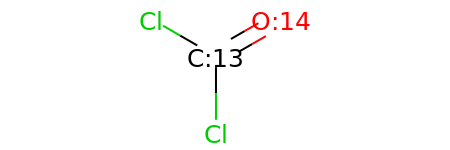

In [73]:
cl_mol

In [78]:
if retro.is_symmetric2(cl_mol,'Cl') and retro.is_symmetric2(oh_mol,Chem.MolFromSmarts('[OH]')): #symmetric function checks to make sure there are only 2 matches
    print('new_mol')
else:
    None

new_mol


# Edit sg_depolymerize so two monomer sets are created with swapped functional groups

In [1]:
from rdkit import Chem

In [93]:
def rishi_oh_cl_edit(pm,match_pair):
    '''
    Take in an editable mol and match_pair and perform the bond breakage to create one monomer w/ OH and another monomer w/ Cl
    '''
    new_mols = []
    cl_mols = []
    oh_mols = []
    
    ### make the first monomer set ###
    em = Chem.EditableMol(pm)
    ai_r,ai_o_right,ai_c,i_dbl0,ai_o_left = match_pair[0]
    bi_r,bi_o_right,bi_c,bi_dbl0,bi_o_left = match_pair[1]
    em.RemoveBond(ai_o_left,ai_c)
    em.RemoveBond(bi_o_left,bi_c)
    i_cl1 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
    i_cl2 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
    em.AddBond(ai_c,i_cl1,Chem.BondType.SINGLE)
    em.AddBond(bi_c,i_cl2,Chem.BondType.SINGLE)
    new_mol1=em.GetMol()
    Chem.SanitizeMol(new_mol1)

    ### make the second monomer set ###
    em2 = Chem.EditableMol(pm)
    em2.RemoveBond(ai_o_right,ai_r)
    em2.RemoveBond(bi_o_right,bi_r)
    i_cl1 = em2.AddAtom(Chem.AtomFromSmiles('Cl'))
    i_cl2 = em2.AddAtom(Chem.AtomFromSmiles('Cl'))
    em2.AddBond(ai_r,i_cl1,Chem.BondType.SINGLE)
    em2.AddBond(bi_r,i_cl2,Chem.BondType.SINGLE)
    new_mol2 = em2.GetMol()
    Chem.SanitizeMol(new_mol2)   

    for new_mol in (new_mol1,new_mol2):
        frag_ids = Chem.GetMolFrags(new_mol, asMols=False)
        if len(frag_ids) == 2:
            frag_mols = Chem.GetMolFrags(new_mol, asMols=True)
            cl_ind = [i for i,x in enumerate(frag_ids) if i_dbl0 in x][0]
            if cl_ind == 0:
                oh_ind = 1
            else:
                oh_ind = 0
            oh_mol = frag_mols[oh_ind]
            cl_mol = frag_mols[cl_ind]
        new_mols.append(new_mol)
        cl_mols.append(cl_mol)
        oh_mols.append(oh_mol)
    return list(zip(new_mols, cl_mols, oh_mols))

In [94]:
rxn_info = retro.sg_rxns['*OC(=O)O'][0]
rxn_info

(<rdkit.Chem.rdchem.Mol at 0x7f5c7b5ec9e0>,
 <function fall20_mse_8803.oh_cl_edit(pm, match_pair)>)

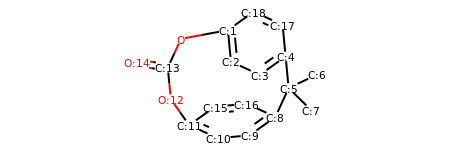

In [95]:
ru.mol_with_atom_index(ru.LinearPol(polymer).PeriodicMol())

In [96]:
match_pair = matches
match_pair

((1, 0, 13, 14, 12), (11, 12, 13, 14, 0))

1 0 13 14 12
11 12 13 14 0


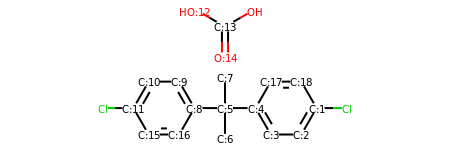

In [97]:
new_mols = []
cl_mols = []
oh_mols = []

### make the first monomer set ###
em = Chem.EditableMol(pm)
ai_r,ai_o_right,ai_c,i_dbl0,ai_o_left = match_pair[0]
print(ai_r,ai_o_right,ai_c,i_dbl0,ai_o_left)
bi_r,bi_o_right,bi_c,bi_dbl0,bi_o_left = match_pair[1]
print(bi_r,bi_o_right,bi_c,bi_dbl0,bi_o_left)
em.RemoveBond(ai_o_left,ai_c)
em.RemoveBond(bi_o_left,bi_c)
i_cl1 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
i_cl2 = em.AddAtom(Chem.AtomFromSmiles('Cl'))
em.AddBond(ai_c,i_cl1,Chem.BondType.SINGLE)
em.AddBond(bi_c,i_cl2,Chem.BondType.SINGLE)
new_mol1=em.GetMol()
Chem.SanitizeMol(new_mol1)

### make the second monomer set ###
em2 = Chem.EditableMol(pm)
em2.RemoveBond(ai_o_right,ai_r)
em2.RemoveBond(bi_o_right,bi_r)
i_cl1 = em2.AddAtom(Chem.AtomFromSmiles('Cl'))
i_cl2 = em2.AddAtom(Chem.AtomFromSmiles('Cl'))
em2.AddBond(ai_r,i_cl1,Chem.BondType.SINGLE)
em2.AddBond(bi_r,i_cl2,Chem.BondType.SINGLE)
new_mol2 = em2.GetMol()
Chem.SanitizeMol(new_mol2)
new_mol2

In [100]:
importlib.reload(retro)
retro.sg_depolymerize(polymer,polymer_linkage,(rxn_info[0],rxn_info[1],rishi_oh_cl_edit))

# Test sg_depolymerize

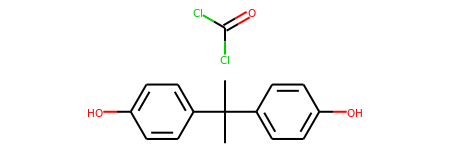

In [8]:
importlib.reload(retro)
polymer_linkage = '*OC(=O)O'
retro.sg_depolymerize(polymer,Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])[0]

# Try sg_depolymerize on relaxed G2G

In [6]:
importlib.reload(retro)
polymer_linkage = '*OC(=O)O'
inds = [x for x in smiles_ls if retro.sg_depolymerize(x,Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0]) != None]
inds

len(inds)

ifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: atomIdx1 != atomIdx2
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [01:33:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [01:33:32] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: attempt to add self-bond
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization 

42

In [7]:
len(inds)

42

In [8]:
retro.sg_depolymerize(inds[0],Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])

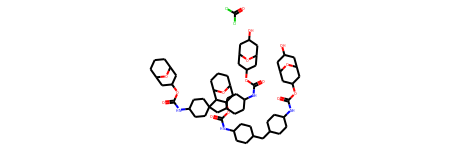

In [105]:
retro.sg_depolymerize(inds[1],Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])

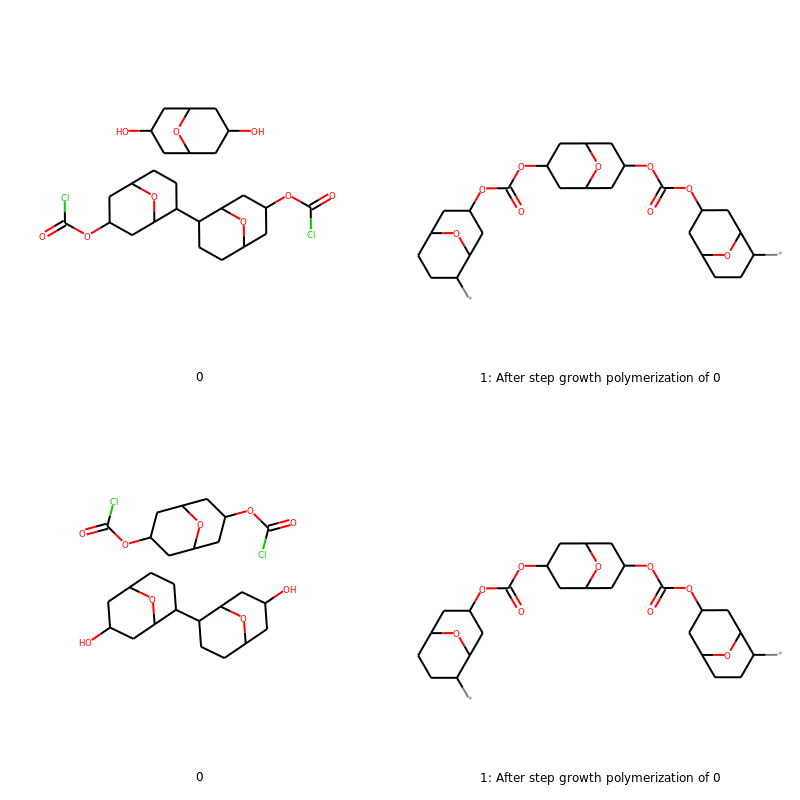

In [9]:
importlib.reload(retro)
retro.drawRxn(inds[0],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

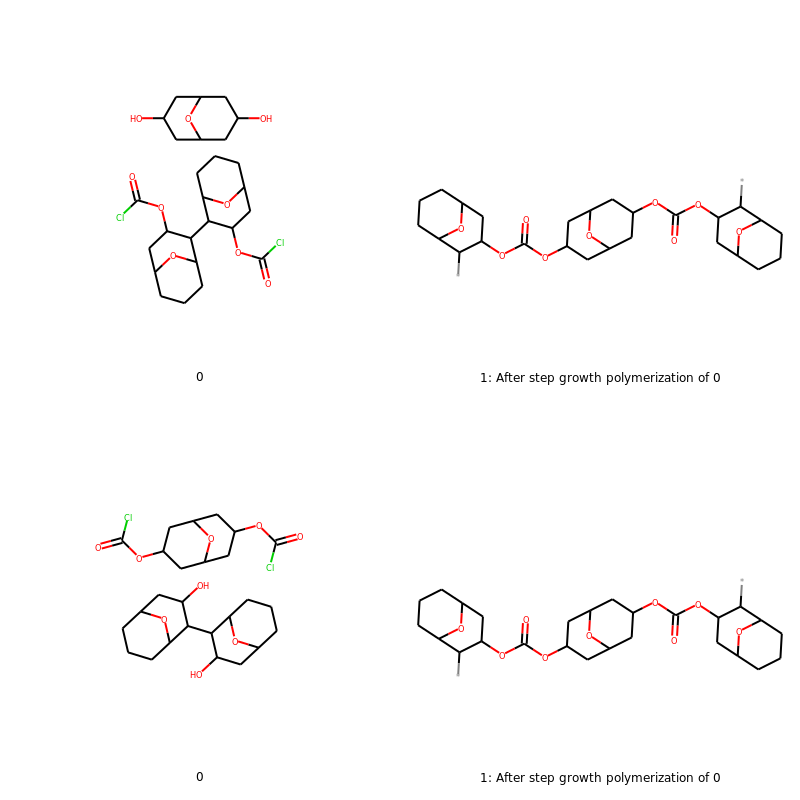

In [10]:
retro.drawRxn(inds[1],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

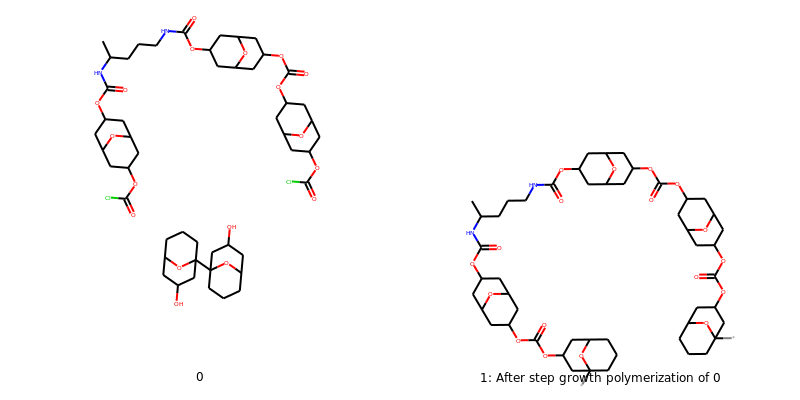

In [11]:
retro.drawRxn(inds[2],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

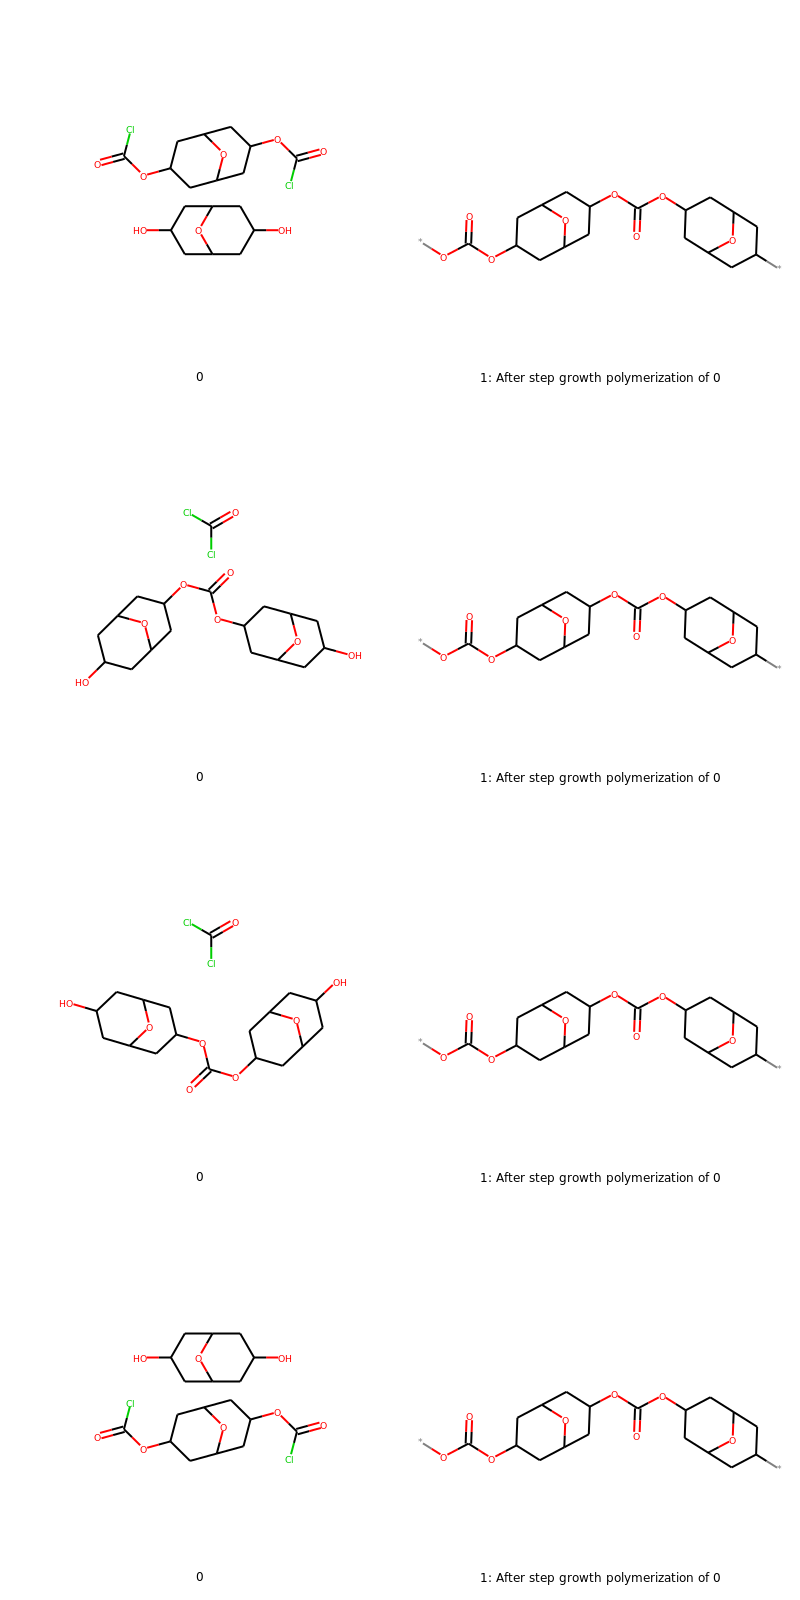

In [12]:
retro.drawRxn(inds[4],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

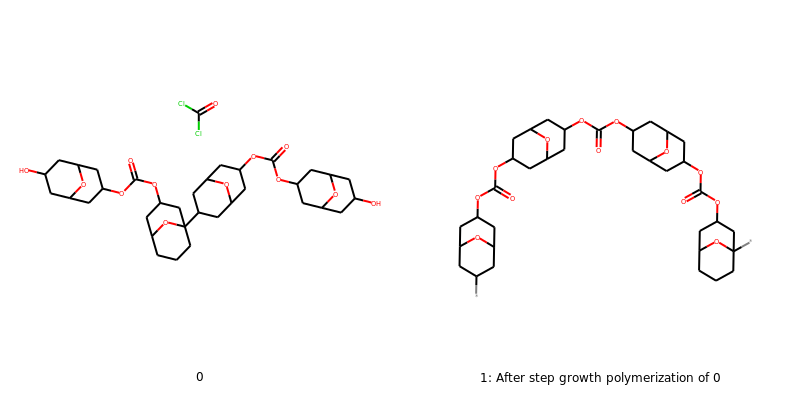

In [19]:
retro.drawRxn(inds[19],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [108]:
df_med[df_med['smiles']==inds[0]]

,smiles,tg,bg,cib
7327,[*]OC(=O)OC1CC2CC([*])CC(C1)O2,464.205761,6.22202,3.455629


In [109]:
out=retro.sg_depolymerize(inds[0],Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])
Chem.MolToSmiles(out)

'O=C(Cl)Cl.OC1CC2CC(O)CC(C1)O2'

# OH-OH reaction

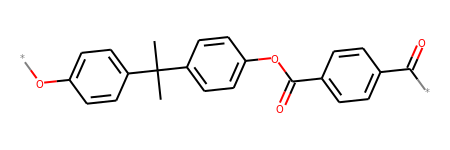

In [9]:
mol = Chem.MolFromSmiles('[*]Oc1ccc(C(C)(C)c2ccc(OC(=O)c3ccc(C([*])=O)cc3)cc2)cc1')
mol

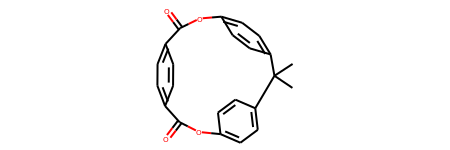

In [10]:
lp = ru.LinearPol(mol)
pm = lp.PeriodicMol()
pm

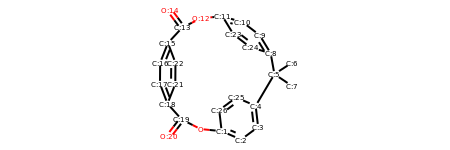

In [11]:
ru.mol_with_atom_index(pm)

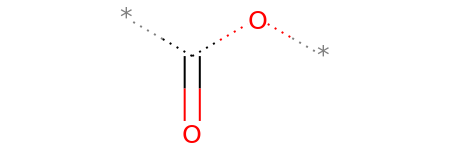

In [150]:
polymer_linkage = Chem.MolFromSmarts('*C(=O)O*')
polymer_linkage

In [151]:
matches = pm.GetSubstructMatches(polymer_linkage)
matches

((15, 13, 14, 12, 11), (18, 19, 20, 0, 1))

In [152]:
new_mols = None
import itertools
match_pairs = list(itertools.combinations(matches, 2))#implement
#for match_pair in matches:
match_pair = matches #needs to be commented out
ai_r1,ai_c,ai_o_dbl,ai_o,ai_r2 = match_pair[0]
bi_r1,bi_c,bi_o_dbl,bi_o,bi_r2 = match_pair[1]

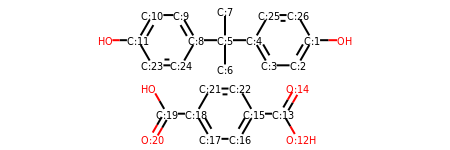

In [159]:
em = Chem.EditableMol(pm)
em.RemoveBond(ai_o,ai_r2)
em.RemoveBond(bi_o,bi_r2)
i_o1 = em.AddAtom(Chem.AtomFromSmiles('O'))
i_o2 = em.AddAtom(Chem.AtomFromSmiles('O'))
em.AddBond(ai_r2,i_o1,Chem.BondType.SINGLE)
em.AddBond(bi_r2,i_o2,Chem.BondType.SINGLE)
new_mol=em.GetMol()
Chem.SanitizeMol(new_mol)
new_mol

In [160]:
#frag_ids = Chem.GetMolFrags(new_mol, asMols=False)
if len(frag_ids) == 2:
    frag_mols = Chem.GetMolFrags(new_mol, asMols=True)
    oh_mol1 = frag_mols[0]
    oh_mol2 = frag_mols[1]
    #return new_mol, cl_mol, oh_mol
else:
    #return None,None,None

In [178]:
retro.is_symmetric2(oh_mol2,Chem.MolFromSmarts('[OH]'))

True

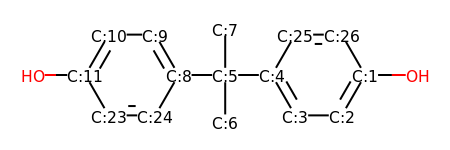

In [164]:
oh_mol2

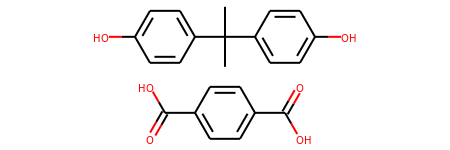

In [187]:
importlib.reload(retro)
polymer_linkage = '*C(=O)O*'
retro.sg_depolymerize(mol,Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0])

In [184]:
retro.is_symmetric2(Chem.MolFromSmiles('c1([OH:16])[cH:1][cH:2][c:3]([C:4]([CH3:5])([CH3:6])[c:7]2[cH:8][cH:9][c:10]([OH:15])[cH:11][cH:12]2)[cH:13][cH:14]1'),Chem.MolFromSmiles('[OH]'))

False

In [3]:
importlib.reload(retro)
polymer_linkage = '*C(=O)O*'
retro.drawRxn(mol,extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

NameError: name 'importlib' is not defined

# Try on relaexed G2G

In [2]:
df = ru.pd_load('/data/rgur/g2g/paper_1/cib_tg_eg/cutoff-.1/first_cib_model/results_List/uniqueCanPolyAndProps.csv')
df.head()

df_med = df[(df['bg']>5.5)&(df['cib']>2.5)&(df['tg']>400)].drop_duplicates()
smiles_ls = df_med['smiles'].tolist()

In [3]:
importlib.reload(retro)
polymer_linkage = '*C(=O)O*'
inds = [x for x in smiles_ls if retro.sg_depolymerize(x,Chem.MolFromSmarts(polymer_linkage),retro.sg_rxns[polymer_linkage][0]) != None]
inds

raphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:13:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
RDKit ERROR: Violation occurred on line 311 in file /home/conda/feedstock_root/build_artifacts/rdkit_1589101087701/work/Code/GraphMol/RWMol.cpp
RDKit ERROR: Failed Expression: !(boost::edge(atomIdx1, atomIdx2, d_graph).second)
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [10:13:28] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: bond already exists
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
!!!Periodization Failed!!!
RDKit ERROR: Violation occurred on line 311 in file /home

['[*]C1CC2CC1CC2COC(=O)C1C2CC(CC2C2CC3CC2C(C(=O)OCC2CC4CC2CC4[*])C3C(=O)OCC2CC3CCC2C3)C1C(=O)OCC1CC2CCC1C2',
 '[*]C1C2CCC1C(COC(=O)C1C3CC(CC3C3CC4CC3C(C(=O)OCC3CC5CCC3C5[*])C4C(=O)OCC3CC4CCC3C4)C1C(=O)OCC1CC3CCC1C3)C2',
 '[*]OC1(C(=O)NC2CCC(CC3CCC(NC(=O)OC4CC5CC(OC(=O)NC6CCC(CC7CCC(NC(=O)OC8CC9CCCC(C8)O9)CC7[*])CC6)CC(C4)O5)CC3)CC2)CC2CCCC(C1)O2',
 '[*]C1CCC2CC(OC(=O)OC3CC4CC(OC(=O)OC5CC6CCC([*])C(C5)O6)CC(C3)O4)CC1O2',
 '[*]C1CC2CC1CC2COC(=O)C1C2CC(C3CC4CC3C(C(=O)OCC3CC5CCC3C5)C4C(=O)OCC3CC4CC3CC4[*])C(C2)C1C(=O)OCC1CC2CCC1C2',
 '[*]C1C(OC(=O)OC2CC3CC(OC(=O)OC4CC5CCCC(O5)C4[*])CC(C2)O3)CC2CCCC1O2',
 '[*]OC(=O)NC1CCC(CC2CCC(NC(=O)OC3CC4CC(OC(=O)NC5CCC(CC6CCC([*])(NC(=O)OC7CC8CCCC(C7)O8)CC6)CC5)CC(C3)O4)CC2)CC1',
 '[*]C1CCCCC1OC(=O)C(Cl)C(Cl)C(=O)OC1CCCCC1[*]',
 '[*]C12CCCC(CC(OC(=O)OC3CC4CC(OC(=O)NC(C)CCCNC(=O)OC5CC6CC(OC(=O)OC7CC8CC(OC(=O)OC9CC%10CCCC([*])(C9)O%10)CC(C7)O8)CC(C5)O6)CC(C3)O4)C1)O2',
 '[*]C1C(OC(=O)OC2CC3CC(OC(=O)OC4CC5CC(OC(=O)NCCCC(C)NC(=O)OC6CC7CC(OC(=O)OC8CC9CC(OC(=

In [4]:
len(inds)

102

In [6]:
for i,x in enumerate(inds):
    print(i,Chem.MolFromSmiles(x).GetNumAtoms())

0 60
1 60
2 71
3 37
4 60
5 37
6 62
7 24
8 72
9 85
10 28
11 50
12 64
13 50
14 62
15 85
16 60
17 62
18 64
19 62
20 54
21 62
22 15
23 71
24 48
25 50
26 62
27 50
28 50
29 60
30 62
31 38
32 60
33 71
34 50
35 60
36 50
37 60
38 60
39 50
40 38
41 60
42 71
43 50
44 60
45 50
46 64
47 71
48 38
49 60
50 62
51 31
52 31
53 24
54 50
55 71
56 60
57 50
58 50
59 60
60 37
61 75
62 84
63 60
64 85
65 41
66 28
67 64
68 64
69 62
70 60
71 64
72 38
73 64
74 72
75 75
76 72
77 71
78 26
79 64
80 64
81 60
82 37
83 60
84 48
85 85
86 64
87 64
88 37
89 60
90 64
91 64
92 64
93 38
94 75
95 64
96 31
97 71
98 64
99 60
100 60
101 64


In [9]:
inds[22]

'[*]OC(=O)OC1CC2CC([*])CC(C1)O2'

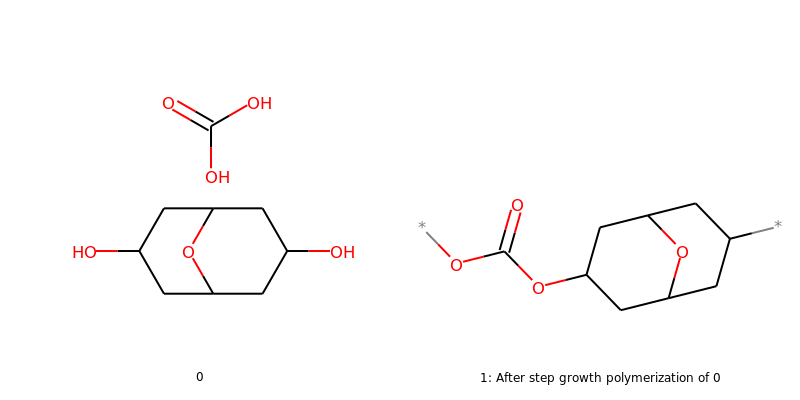

In [8]:
importlib.reload(retro)
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[22],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [201]:
df_med[df_med['smiles']==inds[0]]

,smiles,tg,bg,cib
1989,[*]C1CCCCC1OC(=O)C(Cl)C(Cl)C(=O)OC1CCCCC1[*],413.080023,6.55391,2.884281


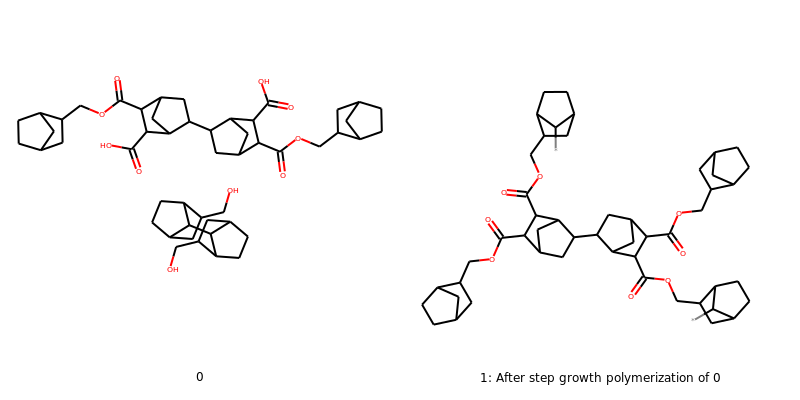

In [5]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[1],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [202]:
df_med[df_med['smiles']==inds[1]]

,smiles,tg,bg,cib
7327,[*]OC(=O)OC1CC2CC([*])CC(C1)O2,464.205761,6.22202,3.455629


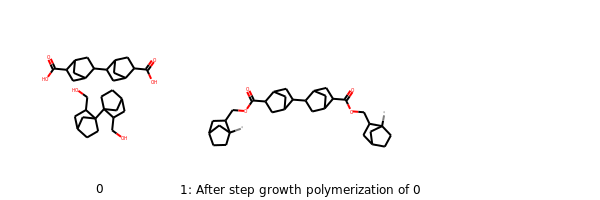

In [193]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[2],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [203]:
df_med[df_med['smiles']==inds[2]]

,smiles,tg,bg,cib
9688,[*]C12CCC(CC1COC(=O)C1CC3CC1CC3C1CC3CC1CC3C(=O...,481.87379,6.587529,3.449625


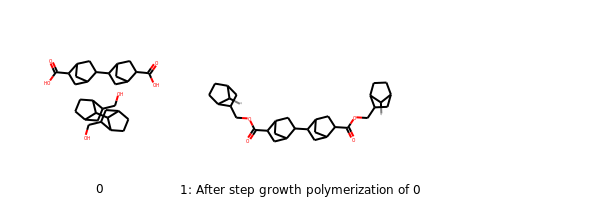

In [194]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[3],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [204]:
df_med[df_med['smiles']==inds[3]]

,smiles,tg,bg,cib
16764,[*]C1C2CCC1C(COC(=O)C1CC3CC1CC3C1CC3CC1CC3C(=O...,484.031435,6.791644,3.4807


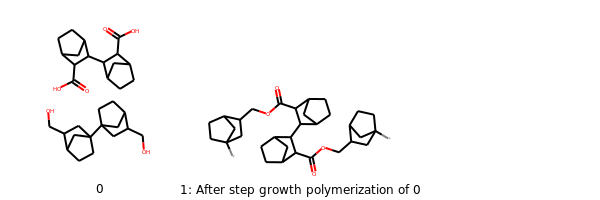

In [195]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[4],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [205]:
df_med[df_med['smiles']==inds[4]]

,smiles,tg,bg,cib
20935,[*]C12CCC(C1)C(COC(=O)C1C3CCC(C3)C1C1C3CCC(C3)...,487.815456,6.583523,3.259143


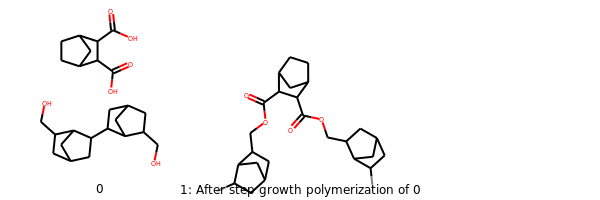

In [196]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[5],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [206]:
df_med[df_med['smiles']==inds[5]]

,smiles,tg,bg,cib
22188,[*]C1CC2CC(COC(=O)C3C4CCC(C4)C3C(=O)OCC3CC4CC(...,486.327857,6.6103,3.314975


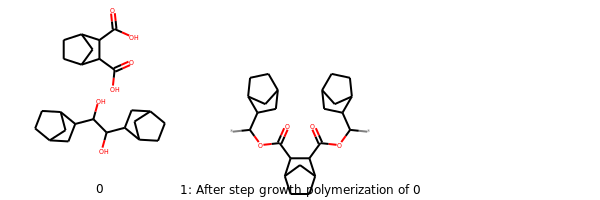

In [197]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[6],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [207]:
df_med[df_med['smiles']==inds[6]]

,smiles,tg,bg,cib
22189,[*]C(OC(=O)C1C2CCC(C2)C1C(=O)OC([*])C1CC2CCC1C...,473.96713,6.407987,3.241475


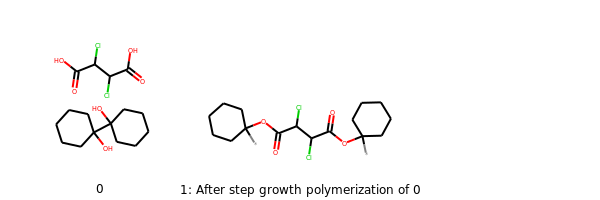

In [209]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[7],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [210]:
df_med[df_med['smiles']==inds[7]]

,smiles,tg,bg,cib
22668,[*]C1(OC(=O)C(Cl)C(Cl)C(=O)OC2([*])CCCCC2)CCCCC1,429.123792,6.125652,2.743366


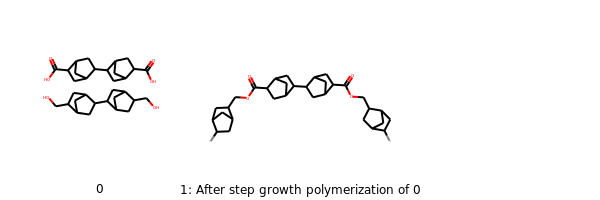

In [198]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[8],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [208]:
df_med[df_med['smiles']==inds[8]]

,smiles,tg,bg,cib
36878,[*]C1CC2CC1CC2COC(=O)C1CC2CC1CC2C1CC2CC1CC2C(=...,475.197857,6.629063,3.473729


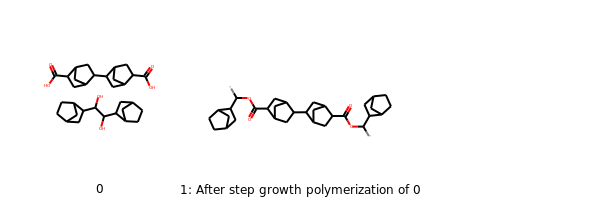

In [199]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[9],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [211]:
df_med[df_med['smiles']==inds[9]]

,smiles,tg,bg,cib
49421,[*]C(OC(=O)C1CC2CC1CC2C1CC2CC1CC2C(=O)OC([*])C...,479.625858,6.528721,3.223018


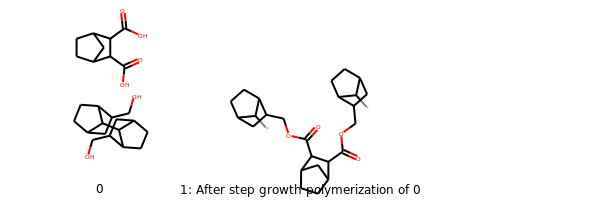

In [200]:
polymer_linkage = '*C(=O)O*'
retro.drawRxn(inds[10],extra_arg1=Chem.MolFromSmarts(polymer_linkage),extra_arg2=retro.sg_rxns[polymer_linkage][0])

In [212]:
df_med[df_med['smiles']==inds[10]]

,smiles,tg,bg,cib
52246,[*]C1C2CCC1C(COC(=O)C1C3CCC(C3)C1C(=O)OCC1CC3C...,476.567051,6.676416,3.314975


In [2]:
for x in []:
    print(x)

In [37]:
import itertools

In [39]:
list(itertools.combinations([1,2],2))

[(1, 2)]